## Pair potential zoo

In [210]:
import numpy as np
from matplotlib import pyplot as plt
import sympy

plt.style.use("bmh")
r_range = np.linspace(5e-1,15,200)

#### Harmonic Potential

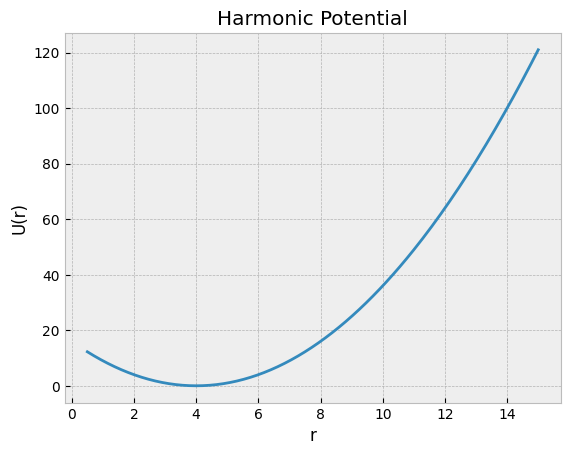

In [211]:
def harmonic(r, k=2.0, re=4.0):
    return 0.5 * k * (r - re)**2

plt.xlabel("r")
plt.ylabel("U(r)")
plt.title("Harmonic Potential")
plt.plot(r_range, harmonic(r_range))

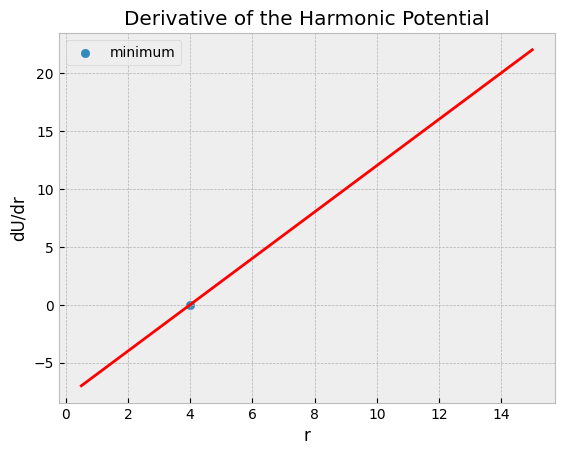

In [212]:
def dharmonic(r, k=2.0, re=4.0):
    return k * (r - re)

plt.xlabel("r")
plt.ylabel("dU/dr")
plt.title("Derivative of the Harmonic Potential")
plt.plot(r_range, dharmonic(r_range), color="red")
plt.scatter([4.0],[0], label="minimum")
plt.legend()

#### Morse Potential

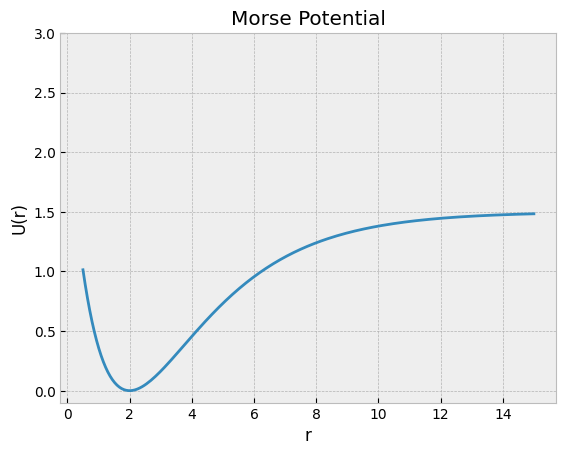

In [213]:
def morse(r, D=1.5, a=0.4, re=2.0):
    return D * (1 - np.exp(-a * (r-re)))**2

plt.xlabel("r")
plt.ylabel("U(r)")
plt.title("Morse Potential")
plt.ylim(-0.1,3)
plt.plot(r_range, morse(r_range))

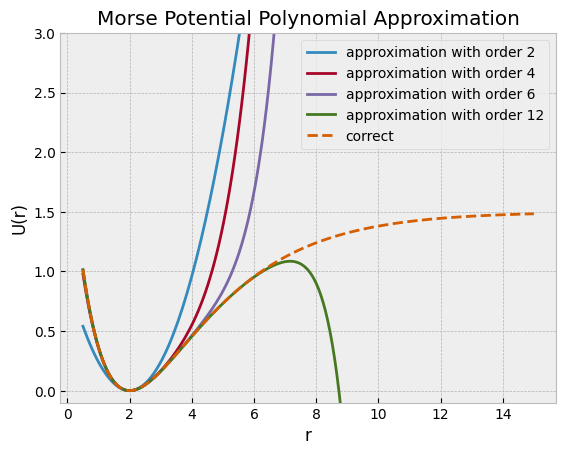

In [214]:
plt.xlabel("r")
plt.ylabel("U(r)")
plt.title("Morse Potential Polynomial Approximation")
plt.ylim(-0.1,3)

MAX_ORDER = 6
r, D, a, re = sympy.symbols("r D a re")
morse_expr = D * (1 - sympy.exp(-a*(r-re)))**2

for p in range(2, MAX_ORDER+1, 2):
    series = morse_expr.series(r, re, p+1).removeO()
    approximation = np.vectorize(sympy.lambdify((r, D, a, re), series, modules='numpy'))

    plt.plot(r_range, approximation(r_range, 1.5, 0.4, 2.0), label=f"approximation with order {p}")

series = morse_expr.series(r, re, MAX_ORDER*2).removeO()
approximation = np.vectorize(sympy.lambdify((r, D, a, re), series, modules='numpy'))
plt.plot(r_range, approximation(r_range, 1.5, 0.4, 2.0), label=f"approximation with order {MAX_ORDER*2}")

plt.plot(r_range, morse(r_range), label="correct", linestyle='dashed')
plt.legend()

#### Lennard--Jones Potential

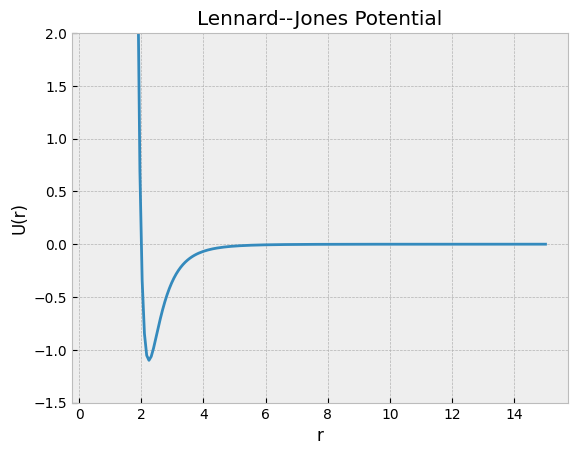

In [215]:
def lj(r, eps=1.1, sigma=2.0):
    return 4 * eps * ((sigma/r)**12 - (sigma/r)**6) 

plt.xlabel("r")
plt.ylabel("U(r)")
plt.title("Lennard--Jones Potential")

plt.ylim(-1.5, 2.0)
plt.plot(r_range, lj(r_range))

#### Buckingham Potential

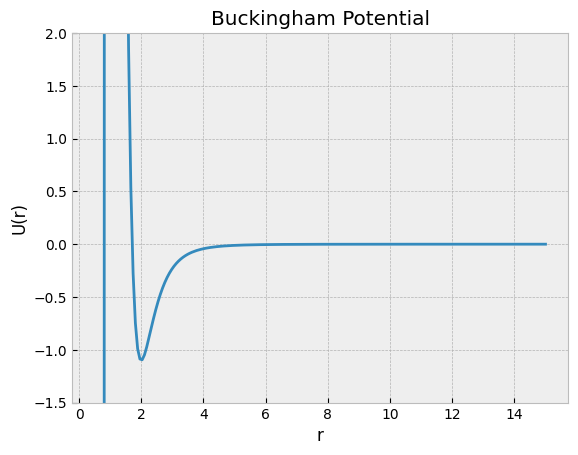

In [216]:
def buckingham(r, gamma=10, eps=1.1, sigma=2.0):
    return eps/(1-6/gamma) * (6/gamma * np.exp(gamma * (1-r/sigma)) - sigma**6/r**6)

plt.xlabel("r")
plt.ylabel("U(r)")
plt.title("Buckingham Potential")

plt.ylim(-1.5, 2.0)
plt.plot(r_range, buckingham(r_range))

#### Coulombic Potential

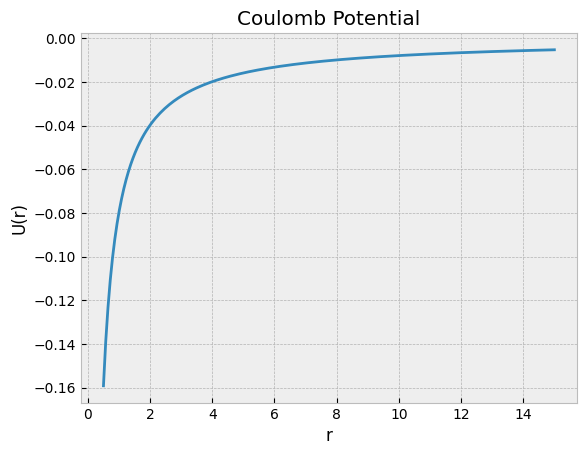

In [217]:
def coulomb(r, q1=-2.0, q2=2.0, eps=4.0):
    return 1/(4*np.pi*eps) * q1*q2/r

plt.xlabel("r")
plt.ylabel("U(r)")
plt.title("Coulomb Potential")
plt.plot(r_range, coulomb(r_range))